# Triangular membership function

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import math
import skfuzzy.membership

Enter a: 2
Enter b: 6


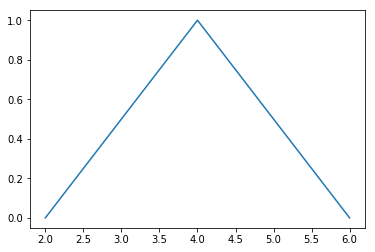

In [12]:
a=float(input("Enter a: "))
b=float(input("Enter b: "))
m=(a+b)/2
X=(a,m,b)
Y=(0,1,0)
plt.plot(X,Y)
plt.show()

In [13]:
x=float(input("Enter the element: "))
if x<=a:
    mem = 0
elif x>a and x<=m:
    mem = (x-a)/(m-a)
elif x>m and x<b:
    mem = (b-x)/(b-m)
else:
    mem=0
    
print("Membership : ",mem)    


Enter the element: 2.5
Membership :  0.25


# Trapezoidal membership function

Enter a: 
1
Enter b: 
5
Enter c: 
7
Enter d: 
8


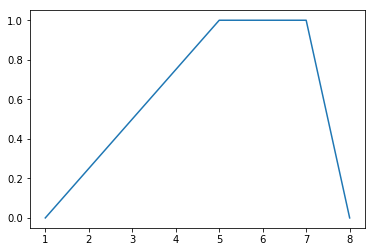

In [14]:
print("Enter a: ")
a=input()
a=float(a)
print("Enter b: ")
b=input()
b=float(b)
print("Enter c: ")
c=input()
c=float(c)
print("Enter d: ")
d=input()
d=float(d)
X=(a,b,c,d)
Y=(0,1,1,0)
plt.plot(X,Y)
plt.show()

In [15]:
x=float(input("Enter the element: "))
if x <= a:
    mem = 0
elif x > a and x <= b :
    mem = (x - a) / (b - a)
elif x > b and x < c :
    mem = 1
elif x >= c and x <= d :
    mem = (d - x) / (d - c)
else :    
    mem=0
    
print("Membership :",mem)    

Enter the element: 4
Membership : 0.75


# Gaussian Distribution

Enter the mean: 0
Enter the variance: 2


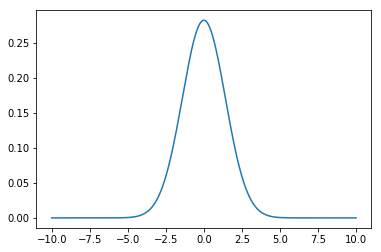

In [16]:
c=float(input("Enter the mean: "))
var=float(input("Enter the variance: "))
sig=np.sqrt(var)
x_axis = np.arange(-10, 10, 0.001)
#mean = c, Standard deviation = sig.
plt.plot(x_axis, norm.pdf(x_axis,c,sig))
plt.show()

In [17]:
x=float(input("Enter the element: "))

mem = np.exp((-1*(x-c)**2)/(2*var))
    
print("membership: ",mem)    

Enter the element: 2.4
membership:  0.23692775868212176


# Generalized bell function

Enter a:5
Enter b:3.5
Enter c:10


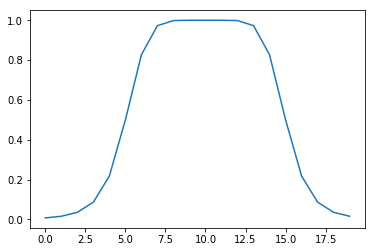

Enter the element:7.5
Membership:  0.9922480620155039


In [67]:
x= np.arange(20)
a=float(input("Enter a:"))
b=float(input("Enter b:"))
c=float(input("Enter c:"))
mf=skfuzzy.gbellmf(x,a,b,c)
plt.plot(x,mf)
plt.show()
x=float(input("Enter the element:"))
mem = 1/(1+abs((x-c)/a)**(2 * b))
print("Membership: ", mem)

# Sigmoid function

Enter a :10
Enter c :3.5


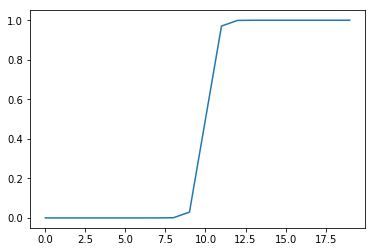

Enter the member : 11
Membership :  1.0


In [74]:
a = float(input("Enter a :"))
c = float(input("Enter c :"))
x=np.arange(20)

sig = skfuzzy.membership.sigmf(x,a,c)
plt.plot(x,sig)
plt.show()
x=float(input("Enter the member : "))
mem= 1/(1+np.exp(-1*a*(x-c)))
print("Membership : ",mem)

In [90]:
x=float(input("Enter the member : "))
mem=1/(1+np.exp(-1*a*(x-c)))
print('Membership : ', mem)

Enter the member : 9
Membership :  0.9820137900379085


# Fuzzy set operations

In [2]:
A= [(1,0.8),(2,0.7),(3,0.1),(4,1.0),(5,0.9),(6,0.3)]
B= [(1,0.3),(2,0.4),(3,0.4),(4,1),(5,0),(6,0)]

In [3]:
def algSum(A,B):
    sum=[]
    
    for i in A:
        for j in B:
            if i[0]==j[0]:
                sum.append((i[0],(i[1]+j[1]-i[1]*j[1])))
    return sum

                         
def cart(A,B):
    c=[]
    
    for i in A:
        for j in B:
            c.append(((i[0],j[0]), min(i[1],j[1])))
    return c
  
    
def union(A,B):
    union=[]

    for i in A:
        for j in B:
            if i[0] == j[0]:
                union.append((i[0],max(i[1],j[1])))

    return union
     
def intersect(A,B):
    intersection=[]
    for i in A:
        for j in B:
            if i[0] == j[0]:
                intersection.append((i[0],min(i[1],j[1])))
    return intersection
      
    
def complement(A):
    A_=[]

    for i in A:
        A_.append((i[0],1-i[1]))
    return A_

def diff(A,B):
    d=[]
    B_=complement(B)
    for i in A:
        for j in B_:
            if i[0]==j[0]:
                d.append((i[0],min(i[1],j[1])))
    return d            

In [5]:
print("Set A : ", A,"\n")
print("Set B : ", B,"\n")

asum=algSum(A,B)
print("Algebraic sum: ",asum,"\n")
dif=diff(A,B)
print("Algebraic difference: ",dif,"\n")
c=cart(A,B)
print("Cartesian product: ",c,"\n")
u=union(A,B)
print("Union: ",u,"\n")
inter=intersect(A,B)
print("Intersection: ", inter,"\n")
com=complement(A)
print("Complement of A: ",com,"\n")
com=complement(B)
print("Complement of B: ",com,'\n')

print("complement(A) union complement(B): ", union(complement(A),complement(B)),"\n")
print("complement(A) intersection complement(B): ", intersect(complement(A),complement(B)))

Set A :  [(1, 0.8), (2, 0.7), (3, 0.1), (4, 1.0), (5, 0.9), (6, 0.3)] 

Set B :  [(1, 0.3), (2, 0.4), (3, 0.4), (4, 1), (5, 0), (6, 0)] 

Algebraic sum:  [(1, 0.8600000000000001), (2, 0.8200000000000001), (3, 0.45999999999999996), (4, 1.0), (5, 0.9), (6, 0.3)] 

Algebraic difference:  [(1, 0.7), (2, 0.6), (3, 0.1), (4, 0), (5, 0.9), (6, 0.3)] 

Cartesian product:  [((1, 1), 0.3), ((1, 2), 0.4), ((1, 3), 0.4), ((1, 4), 0.8), ((1, 5), 0), ((1, 6), 0), ((2, 1), 0.3), ((2, 2), 0.4), ((2, 3), 0.4), ((2, 4), 0.7), ((2, 5), 0), ((2, 6), 0), ((3, 1), 0.1), ((3, 2), 0.1), ((3, 3), 0.1), ((3, 4), 0.1), ((3, 5), 0), ((3, 6), 0), ((4, 1), 0.3), ((4, 2), 0.4), ((4, 3), 0.4), ((4, 4), 1.0), ((4, 5), 0), ((4, 6), 0), ((5, 1), 0.3), ((5, 2), 0.4), ((5, 3), 0.4), ((5, 4), 0.9), ((5, 5), 0), ((5, 6), 0), ((6, 1), 0.3), ((6, 2), 0.3), ((6, 3), 0.3), ((6, 4), 0.3), ((6, 5), 0), ((6, 6), 0)] 

Union:  [(1, 0.8), (2, 0.7), (3, 0.4), (4, 1.0), (5, 0.9), (6, 0.3)] 

Intersection:  [(1, 0.3), (2, 0.4), (3, 0.1

# Composition

In [6]:
def mmcomp(A,B):
    
    a=A.shape
    b=B.shape
    c=[]
    for i in A:
        for j in B.T:
            c.append(max(np.minimum(i,j)))
    return c        
    
def mpcomp(A,B):
    a=A.shape
    b=B.shape
    c=[]
    for i in A:
        for j in B.T:
            c.append(max(i*j))
    return c        
    

In [7]:
R=np.array([[0.4,0.6,0],[0.9,1,0.1]])
S=np.array([[0.5,0.8],[0.1,1],[0,0.6]])
print("R :",R,"\n")
print("S :",S,"\n")
#print(np.matmul(R,S))

R : [[0.4 0.6 0. ]
 [0.9 1.  0.1]] 

S : [[0.5 0.8]
 [0.1 1. ]
 [0.  0.6]] 



In [8]:
mm=np.array(mmcomp(R,S))
print("The max-min composition of R and S: \n",mm.reshape(2,2),"\n")
mp=np.array(mpcomp(R,S))
print("The max-product composition of R and S: \n",mp.reshape(2,2),"\n")

The max-min composition of R and S: 
 [[0.4 0.6]
 [0.5 1. ]] 

The max-product composition of R and S: 
 [[0.2  0.6 ]
 [0.45 1.  ]] 

